In [1]:
# Activate intractive functionality of matplotlib
%matplotlib notebook
# import pakages
import os
import matplotlib.pyplot as plt

from pyccapt.calibration import variables, data_loadcrop
from pyccapt.tools.module_dir import MODULE_DIR


In [2]:
variables.path = os.path.join(os.path.split(os.path.split(MODULE_DIR)[0])[0], 'tests//data')
variables.result_path = os.path.join(os.path.split(os.path.split(MODULE_DIR)[0])[0], 'results')
if not os.path.isdir(variables.result_path):
        os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
# dataset name
dataset_name = 'OLO_AL_6_data'
filename = variables.path + '//' + dataset_name + '.h5'
savename = variables.result_path + '//' + dataset_name + '.h5'

In [3]:
# Create data farame out of hdf5 file dataset
dldGroupStorage = data_loadcrop.fetch_dataset_from_dld_grp(filename)
dld_masterDataframe = data_loadcrop.concatenate_dataframes_of_dld_grp(dldGroupStorage)

{'dld': ['high_voltage', 'pulse_voltage', 'start_counter', 't', 'x', 'y'], 'oxcart': ['high_voltage', 'main_chamber_vacuum', 'num_events', 'pulse_voltage', 'temperature', 'time_counter'], 'tdc': ['channel', 'high_voltage', 'pulse_voltage', 'start_counter', 'time_data'], 'time': ['time_h', 'time_m', 'time_s']}


$$\textbf {Crop and select the stable projection(right side) of below plotted graph}$$

<IPython.core.display.Javascript object>


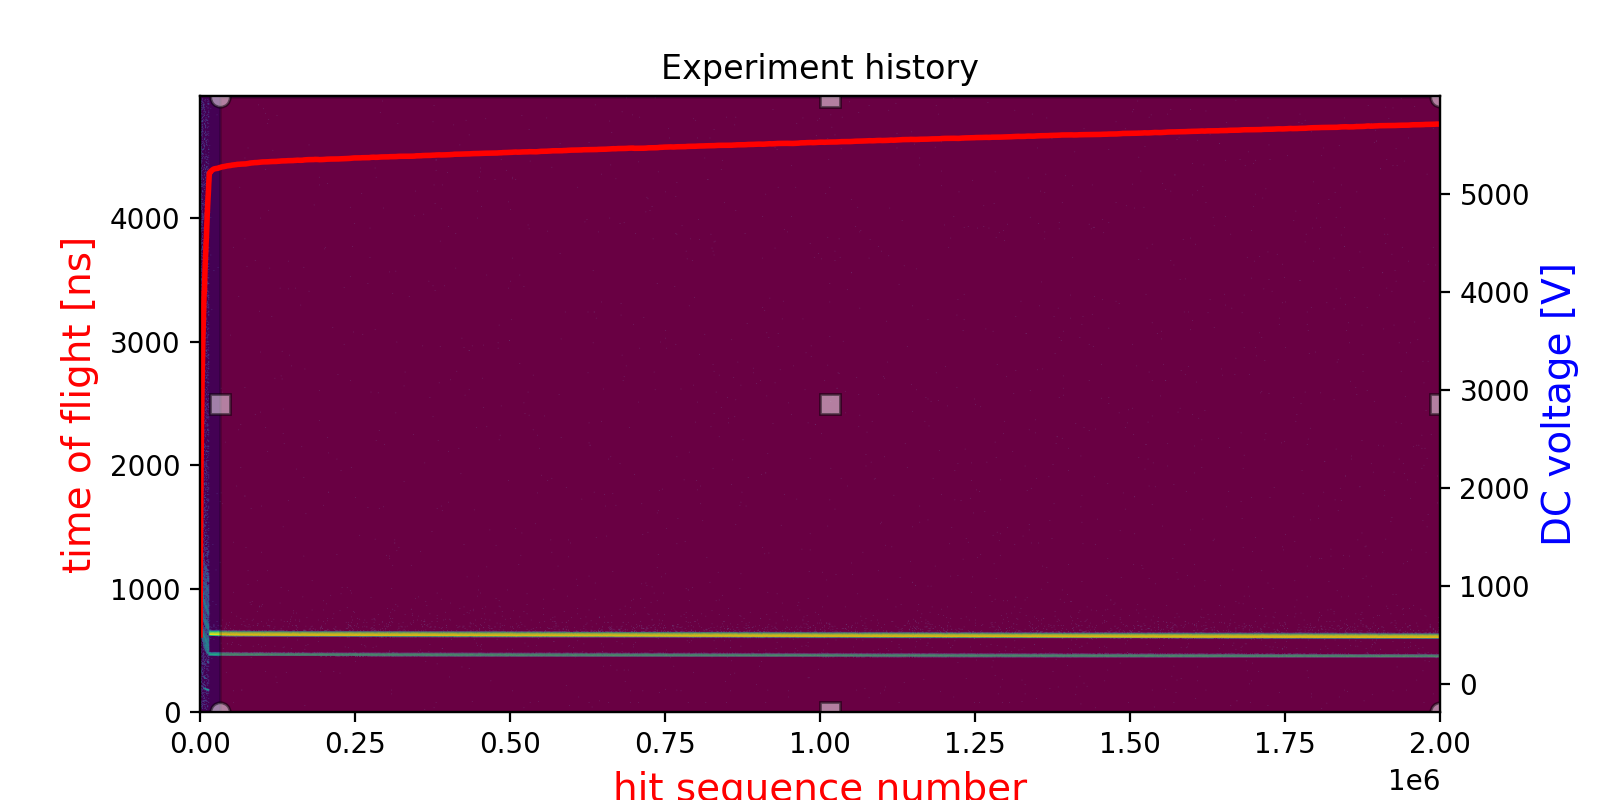

In [4]:
# Plot and select the experiment history
fig1, ax1 = plt.subplots(figsize=(8, 4))
data_loadcrop.plot_graph_for_dld_high_voltage(ax1, dldGroupStorage, save_name = variables.result_path + '//ex_hist_' + dataset_name)


$$\textbf{Boundaries of the selected(cropped) part of the graph is printed below}$$

In [5]:
# Crop the dataset
print('Min Idx:', variables.selected_x1, 'Max Idx:', variables.selected_x2)
data_crop = data_loadcrop.crop_dataset(dld_masterDataframe)

Min Idx: 32135.349987399182 Max Idx: 2000078.9790196572


$$\textbf {Select the region of maximum concentration of electrons in the below plotted graph to utlize relevant data and avoid noise}$$

<IPython.core.display.Javascript object>


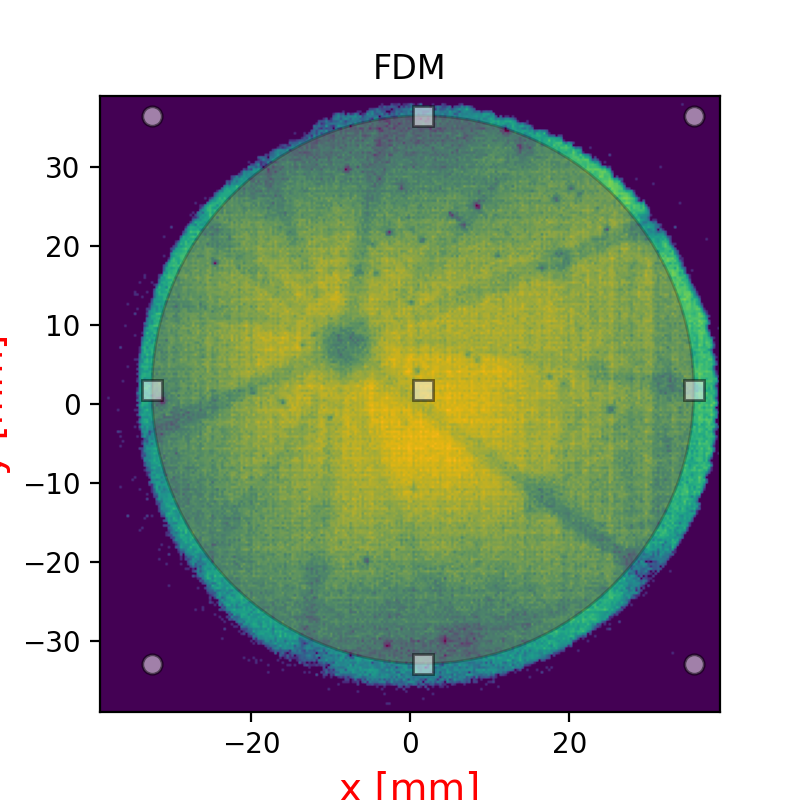

In [6]:
# Plot and select the FDM
fig1, ax1 = plt.subplots(figsize=(4,4))
data_loadcrop.plot_crop_FDM(ax1, fig1, data_crop, save_name = variables.result_path + '//FDM_' + dataset_name)

$$\textbf {The region selected in the previous step is displayed below.}$$

<IPython.core.display.Javascript object>


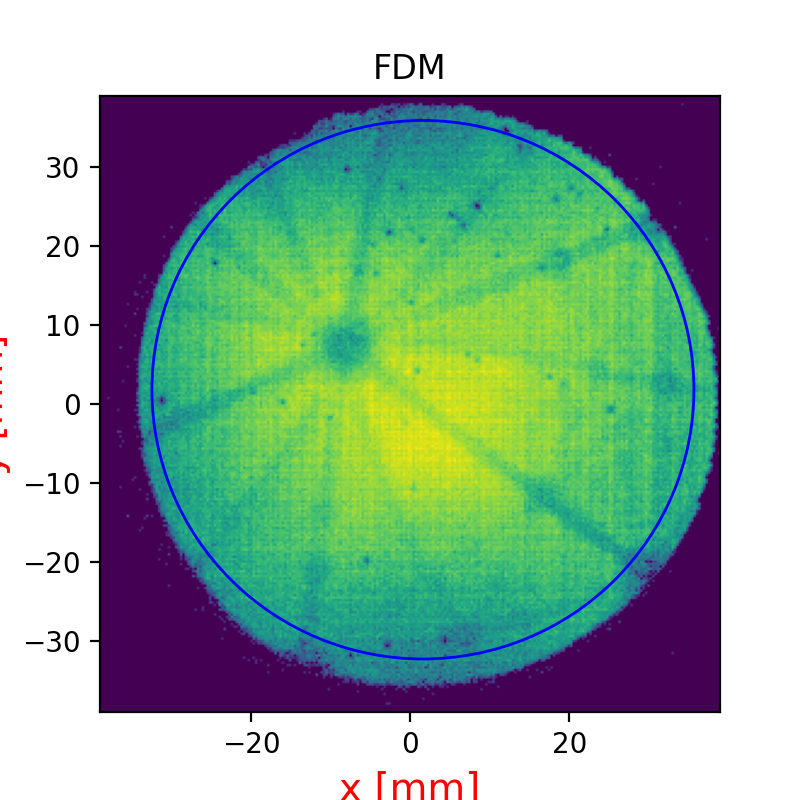

x: 1.6090733418367336 y: 1.7897059493440324 roi: 34.079632653061225


In [8]:
# plot selected area in FDM
fig1, ax1 = plt.subplots(figsize=(4,4))
data_loadcrop.plot_FDM_after_selection(ax1, fig1, data_crop, save_name = variables.result_path + 'FDM_c' + dataset_name)

$$\textbf {Selected dataset after processing has been plotted.}$$

<IPython.core.display.Javascript object>


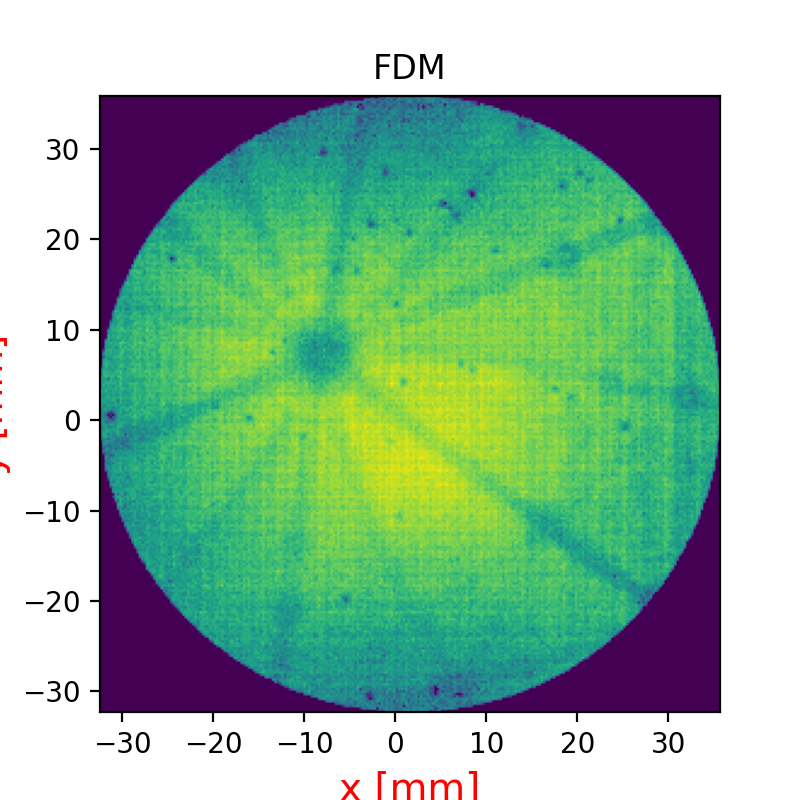

In [10]:
# Crop and plot the dataset
fig1, ax1 = plt.subplots(figsize=(4,4))
data_crop_FDM = data_loadcrop.crop_data_after_selection(data_crop)
data_loadcrop.plot_FDM(ax1, fig1, data_crop_FDM, save_name = variables.result_path + '//FDM_crop_' + dataset_name)

In [11]:
# save the dataset to hdf5 file
name = os.path.splitext(filename)[0]
data_loadcrop.save_croppped_data_to_hdf5(data_crop_FDM, dld_masterDataframe, savename)

tofCropLossPct 7.253552884052938
